## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [8]:
control_new=df[(df['group']=='control') & (df['landing_page']=='new_page')].user_id.count()
treatment_old=df[(df['group']=='treatment') & (df['landing_page']=='old_page')].user_id.count()
control_new+treatment_old

3893

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**All columns have the same number of non-null values, so no row has missing value**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Drop rows with group = control and landing_page=new_page
df2=df.drop(df[(df['group']=='control') & (df['landing_page']=='new_page')].index )
# Drop rows wiht group = treatment and landing_page=old_page
df2=df2.drop(df[(df['group']=='treatment') & (df['landing_page']=='old_page')].index)

df2.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.user_id.value_counts().reset_index().head()

,index,user_id
0,773192,2
1,630732,1
2,811737,1
3,797392,1
4,795345,1


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [183]:
p_control=df2[df2['group']=='control'].converted.mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [184]:
p_treatment=df2[df2['group']=='treatment'].converted.mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
pages=df2.landing_page.value_counts().reset_index()
pages

,index,landing_page
0,new_page,145310
1,old_page,145274


In [20]:
pages[pages['index']=='new_page'].landing_page.sum()/pages.landing_page.sum()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**As the propability of an individual to recieve the new page is about 0.5 which make it a fair check for landing page by control and treatment group.**

**However, for calculated conversion rate for control and treatment groups, it is observed the conversion rate is slightly decrease when using new page by treatment group than using the old page by the control group.**

**I think around 145000 unique users are enough number to be more likely ot believe that the new page has no evidence it leads to more conversion**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_0$** is $P_{new} - P_{old}$ <= 0

**$H_1$** is $P_{new} - P_{old}$  > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [147]:
# As assumed above it is equal to the converted rate regardless of page.
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br>

In [146]:
# As assumed above it is equal to the converted rate regardless of page.
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [144]:
n_new=df2[df2['landing_page']=='new_page'].converted.count()
n_new

145310

d. What is $n_{old}$?

In [145]:
n_old=df2[df2['landing_page']=='old_page'].converted.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [149]:
new_page_converted=np.random.choice([1,0],n_new,p=[p_new,1-p_new])
new_page_converted

array([1, 0, 1, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [150]:
old_page_converted=np.random.choice([1,0],n_old,p=[p_old,1-p_old])
old_page_converted

array([1, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [181]:
new_page_converted.mean()-old_page_converted.mean()

-0.0004974236345049454

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [156]:
p_diffs=[]
for _ in range (10000):
    new_page_converted=np.random.choice([1,0],n_new,p=[p_new,1-p_new])
    old_page_converted=np.random.choice([1,0],n_old,p=[p_old,1-p_old])
    diff=new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(diff)
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

we are 95% sure that the different of conversion rate between new and old pages is between -0.0023426028328859235,0.0023724429969896217 min-max values 


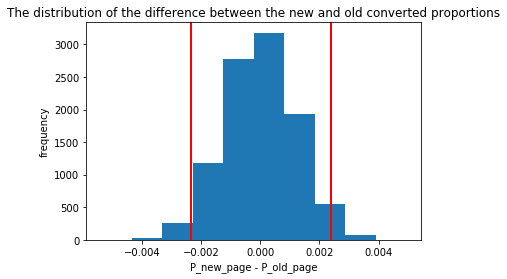

In [180]:
low=np.percentile(p_diffs,2.5)
high=np.percentile(p_diffs,97.5)
plt.hist(p_diffs);
plt.axvline(x=low,color='r',linewidth=2);
plt.axvline(x=high,color='r',linewidth=2);
plt.title('The distribution of the difference between the new and old converted proportions')
plt.xlabel('P_new_page - P_old_page')
plt.ylabel('frequency')
print('we are 95% sure that the different of conversion rate between new and old pages is between {},{} min-max values '.format(low,high))

#### This plot is normally distributed as we are using the sampling distribution which has the  characteristic of being normally distributed with large enough sample size.(Central Limit Theorem)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.908

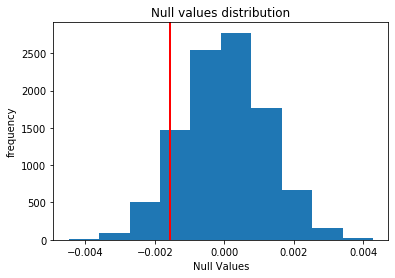

In [188]:
null_vals=np.random.normal(0,p_diffs.std(),p_diffs.size)
actual_diff=p_treatment-p_control
plt.hist(null_vals);
plt.axvline(x=actual_diff,color='r',linewidth=2);
plt.title('Null values distribution')
plt.xlabel('Null Values')
plt.ylabel('frequency')
(null_vals>actual_diff).mean()

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P_value.**
* This value calculates the proportion of null values that are considered extreme based on the alternative.
* High P_value ( greater than threshold of error 1 {0.05} ) means we fail to reject the null hypothesis.
* Low P_value ( less than threshold of error 1 {0.05} ) means we can reject the null in favor of the alternative hypothesis.

#### Large P_value appeared ( 0.908 )in the calculations means;
*we shoudn't move away from the null hypothesis and we fail to reject the null hypothesis which states that the old page is better or as good as the new page.
and take the decision that there is no need or gain of using the new page and to keep the landing page as per the old page*

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [189]:
import statsmodels.api as sm

convert_old =df2[df2['landing_page']=='new_page'].converted.sum()
convert_new = df2[df2['landing_page']=='new_page'].converted.sum()
n_old = df2[df2['landing_page']=='old_page'].converted.count()
n_new = df2[df2['landing_page']=='new_page'].converted.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [203]:
zstat, p_val =sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='two-sided')
print('p_val for the z-test = {0:0.3f} which is greater than 0.05 (alpha value)'.format(p_val))

p_val for the z-test = 0.980 which is greater than 0.05 (alpha value)


In [204]:
zstat, p_val =sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')
print('p_val for the z-test = {0:0.3f} which is greater than 0.05 (alpha value)'.format(p_val))

p_val for the z-test = 0.510 which is greater than 0.05 (alpha value)


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z-Score and P_value calculated above for two alternatives :**
1. alternative='two-sided' : which means the new_page diverted proprtion is not equal to the old_page diverted proportion.
2. alternative='smaller' : which means the new_page diverted proprtion is greater than the old_page diverted proportion.

**From both calucations we have P_value greater than 0.05 so we fail to reject the null hypothesis in both case and be more sure that the old_page diverted proportion is equal (as per first 'two-sided' alternative) or greater than (as per second 'smaller' alternative) the new_page diverted proportion.
which agree the previous conclusion in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [205]:
df2['ab_page']=pd.get_dummies(df2.landing_page).new_page
df2['intercept']=1
df2.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [206]:
import statsmodels.api as sm

lr=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=lr.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [207]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Mar 2020   Pseudo R-squ.:               8.077e-06
Time:                        03:34:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [208]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [209]:
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

*From above parameters, if the the individual is using the old page will be 1.015 times more likely to make convertion than if he is using the new page, holding all other variables constant.*

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

*The P_value associated with ab_page is 0.19 which is greater than 0.05 the threshold of error_1 percent and this means we still fail to reject the null which is in this case the new and old page have the same conversion rate.<br>*
#### P_value here is different than P_value in Part 2 as:
* The null and alternative hypotheses associated with this regression model is<br>
   **The Null Hypothesis  $H_0$** is $P_{new} = P_{old}$  <br>
   **The alternative      $H_1$** is $P_{new} ≠ P_{old}$ >  0
* The null and alternative hypotheses in the **Part II** is 
   **The Null Hypothesis  $H_0$** is $P_{new} - P_{old}$ <= 0 <br>
   **The alternative      $H_1$** is $P_{new} - P_{old}$ >  0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is allways better to collect more factors that may affect the conversion rate not only the new and old page to be more cofident in making proper decision that will target popularity of the people and changes that will target kind of people depending on their culture, their habbits, their average income and any other factors that may be considered and can be evaluated**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [210]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [211]:
df_new.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1


In [212]:
### Create the necessary dummy variables
pd.get_dummies(df_new.country).head(1)

,CA,UK,US
user_id,,,
834778,0,1,0


In [213]:
df_new[['CA','UK','US']]=pd.get_dummies(df_new.country)
df_new.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [214]:
### Fit Your Linear Model And Obtain the Results

lr2=sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK']])
results2=lr2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 05 Mar 2020   Pseudo R-squ.:               2.323e-05
Time:                        03:36:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [215]:
np.exp(results2.params)

intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64

In [216]:
1/np.exp(results2.params)

intercept    7.310207
ab_page      1.015056
CA           1.041599
UK           0.990165
dtype: float64

*From above parameters;*

* if the the individual is using the old page will be 1.015 times more likely to make convertion than if he is using the new page, holding all other variables constant.
* if the the individual is from the UK will be 1.01 times more likely to make convertion than if he is from US, holding all other variables constant.
* if the the individual is from the US will be 1.04 times more likely to make convertion than if he is from CA, holding all other variables constant.

#### *AS observed from above increase rate depending on loading page or country there is a slight change in conversion rate, which meens there is no need or profit from  doing this change.*

<a id='conclusions'></a>
## Conclusions

#### Refer to Statistical Significance:
**All evidences from the above calcuations, using different ways to interpret the data, confirm there is no need to move to the new page as across all the sample size, we have no evidence to reject the null hypothesis and become more and more sure the old page is better or at least as good as the new page according to diverted proportion.**


#### Refer to Practical Significance:
**The changes in diverted rate at most optimistic diverted rate is 1.04 times what it has been before doing any change.
So, we will lose time and money for designing the new page and get slightly positive change in diverted rate or even get the worse negative chabge.
As well, the old users of the page will need time to get used to the new page design which aslo affect the diverted rate negatively if the new page is used.**

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.